In [3]:
import networkx as nx
import osmnx as ox

ox.__version__

'2.0.1'

In [4]:
import matplotlib.pyplot as plt
import geopandas as gpd
import pandas as pd

### Load Features in Berlin

In [5]:
# Load the geometry GeoDataFrame
landuse_point_gdf = gpd.read_file("data/landuse_point_berlin.shp")
landuse_polygon_gdf = gpd.read_file("data/landuse_polygon_berlin.shp")

# Concatenate the two GeoDataFrames
landuse_gdf = gpd.GeoDataFrame(pd.concat([landuse_point_gdf, landuse_polygon_gdf], ignore_index=True))

In [6]:
leisure_point_gdf = gpd.read_file("data/feature_leisure_point_berlin.shp")
leisure_polygon_gdf = gpd.read_file("data/feature_leisure_polygon_berlin.shp")

# Concatenate the two GeoDataFrames
leisure_gdf = gpd.GeoDataFrame(pd.concat([leisure_point_gdf, leisure_polygon_gdf], ignore_index=True))

In [7]:
shop_point_gdf = gpd.read_file("data/feature_shop_point_berlin.shp")
shop_polygon_gdf = gpd.read_file("data/feature_shop_polygon_berlin.shp")

# Concatenate the two GeoDataFrames
shop_gdf = gpd.GeoDataFrame(pd.concat([shop_point_gdf, shop_polygon_gdf], ignore_index=True))

In [8]:
transports_point_gdf = gpd.read_file("data/feature_transports_point_berlin.shp")
transports_polygon_gdf = gpd.read_file("data/feature_transports_polygon_berlin.shp")

# Concatenate the two GeoDataFrames
transports_gdf = gpd.GeoDataFrame(pd.concat([transports_point_gdf, transports_polygon_gdf], ignore_index=True))

In [63]:
shop_gdf

,element,id,shop,amenity,name,addr_city,addr_postc,geometry,district name
0,node,29927324,chemist,None,dm,Berlin,10551,POINT (13.32944 52.52751),Mitte
1,node,29997723,kiosk,fuel,Aral,Berlin,14057,POINT (13.28095 52.50837),Charlottenburg-Wilmersdorf
2,node,35966604,electronics,None,MediaMarkt,Berlin,10627,POINT (13.30715 52.50612),Charlottenburg-Wilmersdorf
3,node,58489979,supermarket,None,Netto Marken-Discount,Berlin,10179,POINT (13.40737 52.50982),Mitte
4,node,58489996,bakery,None,None,Berlin,10179,POINT (13.4083 52.51036),Mitte
...,...,...,...,...,...,...,...,...,...
20828,way,1297672726,car_repair,None,Carglass,Berlin,13507,"POLYGON ((13.29301 52.57825, 13.29262 52.57825...",Reinickendorf
20829,way,1304450152,seafood,None,None,None,None,"POLYGON ((13.21704 52.43867, 13.21706 52.43867...",Steglitz-Zehlendorf
20830,way,1306210336,kiosk,None,Kiosk & Café,Berlin,14129,"POLYGON ((13.21975 52.43225, 13.2198 52.43222,...",Steglitz-Zehlendorf
20831,way,1311962700,kiosk,None,City Kiosk,None,None,"POLYGON ((13.36128 52.54478, 13.36136 52.54481...",Mitte


### Load Berlin districts

In [18]:
districts_point_gdf = gpd.read_file("data/districts_point_berlin.shp")
districts_polygon_gdf = gpd.read_file("data/districts_polygon_berlin.shp")

# Concatenate the two GeoDataFrames
berlin_districts = gpd.GeoDataFrame(pd.concat([districts_point_gdf, districts_polygon_gdf], ignore_index=True))
berlin_districts = berlin_districts.rename(columns={'admin_leve': 'admin_level'})

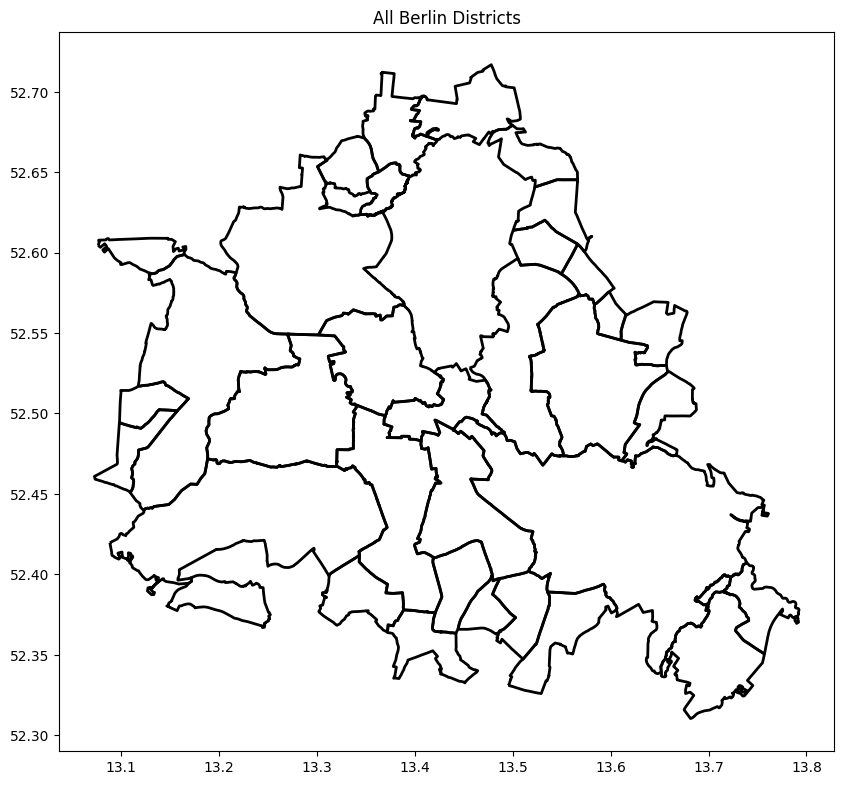

In [19]:
# Filter for districts and plot
berlin_districts[(berlin_districts.geometry.type == 'Polygon') & (berlin_districts['admin_level'] == '9')].plot(edgecolor="black", facecolor="none", linewidth=2, figsize=(10, 10))
plt.title("All Berlin Districts")
plt.show()

### Assign district names to Berlin features

In [42]:
def setBerlinDistrict(geo, districts_geo):
    geo_point = geo
    district_name = ""
    for i in range(len(districts_geo)):
        if geo_point.within(districts_geo.iloc[i]["geometry"]):
            district_name = districts_geo.iloc[i]['name']
            break

    return district_name

In [ ]:
shop_gdf['district name'] = [setBerlinDistrict(geo, berlin_districts[berlin_districts['admin_level'] == '9']) for geo in shop_gdf['geometry'].values]

In [47]:
landuse_gdf['district name'] = [setBerlinDistrict(geo, berlin_districts[berlin_districts['admin_level'] == '9']) for geo in landuse_gdf['geometry'].values]

In [48]:
leisure_gdf['district name'] = [setBerlinDistrict(geo, berlin_districts[berlin_districts['admin_level'] == '9']) for geo in leisure_gdf['geometry'].values]

In [49]:
transports_gdf['district name'] = [setBerlinDistrict(geo, berlin_districts[berlin_districts['admin_level'] == '9']) for geo in transports_gdf['geometry'].values]

In [53]:
# Save GeoDataframe into Shapefiles
landuse_gdf[landuse_gdf.geometry.type == "Point"].to_file("data/landuse_point_berlin.shp")
landuse_gdf[landuse_gdf.geometry.type == "Polygon"].to_file("data/landuse_polygon_berlin.shp")

leisure_gdf[leisure_gdf.geometry.type == "Point"].to_file("data/feature_leisure_point_berlin.shp")
leisure_gdf[leisure_gdf.geometry.type == "Polygon"].to_file("data/feature_leisure_polygon_berlin.shp")

shop_gdf[shop_gdf.geometry.type == "Point"].to_file("data/feature_shop_point_berlin.shp")
shop_gdf[shop_gdf.geometry.type == "Polygon"].to_file("data/feature_shop_polygon_berlin.shp")

transports_gdf[transports_gdf.geometry.type == "Point"].to_file("data/feature_transports_point_berlin.shp")
transports_gdf[transports_gdf.geometry.type == "Polygon"].to_file("data/feature_transports_polygon_berlin.shp")

C:\Users\naimi\AppData\Local\Temp\ipykernel_32168\3331036409.py:2: UserWarning: Column names longer than 10 characters will be truncated when saved to ESRI Shapefile.
  landuse_gdf[landuse_gdf.geometry.type == "Point"].to_file("data/landuse_point_berlin.shp")
c:\Users\naimi\anaconda3\envs\dads\lib\site-packages\pyogrio\raw.py:723: RuntimeWarning: Normalized/laundered field name: 'district name' to 'district n'
  ogr_write(
C:\Users\naimi\AppData\Local\Temp\ipykernel_32168\3331036409.py:3: UserWarning: Column names longer than 10 characters will be truncated when saved to ESRI Shapefile.
  landuse_gdf[landuse_gdf.geometry.type == "Polygon"].to_file("data/landuse_polygon_berlin.shp")
c:\Users\naimi\anaconda3\envs\dads\lib\site-packages\pyogrio\raw.py:723: RuntimeWarning: Normalized/laundered field name: 'district name' to 'district n'
  ogr_write(
C:\Users\naimi\AppData\Local\Temp\ipykernel_32168\3331036409.py:5: UserWarning: Column names longer than 10 characters will be truncated when 

## Plot Berlin map

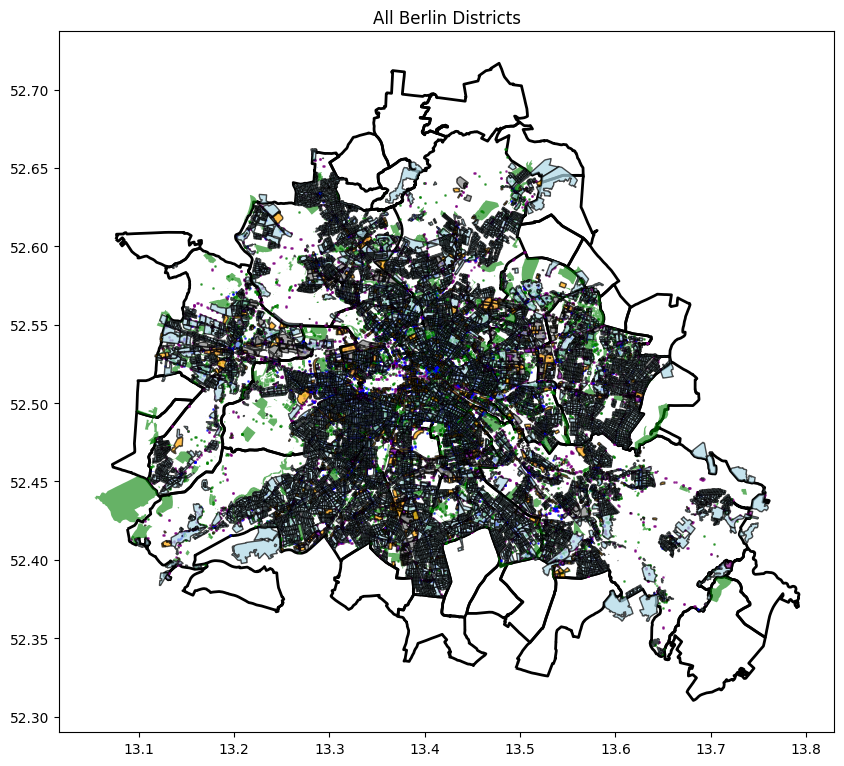

In [ ]:
fig, ax = plt.subplots(figsize=(10, 10))

berlin_districts[(berlin_districts.geometry.type == 'Polygon') & (berlin_districts['admin_level'] == '9')].plot(edgecolor="black", facecolor="none", linewidth=2, ax=ax)

# Define a color map for landuse types
landuse_colors = {
    "residential": "lightblue",
    "commercial": "orange",
    "industrial": "gray",
    "retail": "purple",
    "park": "green"
}

transports_gdf.plot(ax=ax, color='purple', alpha=0.6, label = transports_gdf['amenity'], markersize=1)
shop_gdf.plot(ax=ax, color='blue', alpha=0.6, label = shop_gdf['shop'], markersize=1)
leisure_gdf.plot(ax=ax, color='green', alpha=0.6, label = leisure_gdf['leisure'], markersize=1)

# Assign colors based on the 'landuse' tag
landuse_gdf['color'] = landuse_gdf['landuse'].map(landuse_colors).fillna("lightgray")

# Overlay the landuse data with corresponding colors
for landuse, color in landuse_colors.items():
    subset = landuse_gdf[landuse_gdf['landuse'] == landuse]
    if len(subset) <= 0:
        continue
    subset.plot(ax=ax, color=color, edgecolor='black', alpha=0.7, label=landuse)

plt.title("All Berlin Districts")
plt.show()